In [34]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sn


In [35]:
# Import the data
df = pd.read_excel("Electronic-store-sales-details.xls")
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [36]:
# Rename column Order Date to Date
df.rename(columns = {'Order Date':'Date'}, inplace = True)

In [37]:
df.head(2)

,Row ID,Order ID,Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Laptops,Dell,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Laptops,HP,"Hon Deluxe Fabric Upholstered Stacking HP, Rou...",731.94,3,0.0,219.5820


In [38]:
# Group data to qaurter sales 
df =  df.set_index("Date").groupby([pd.Grouper(freq="Q"), 'Sales']).sum().reset_index()
df.head()

,Date,Sales,Row ID,Postal Code,Quantity,Discount,Profit
0,2016-03-31,1.272,2347,78207,2,0.8,-2.1624
1,2016-03-31,1.344,3767,77036,1,0.2,0.5040
2,2016-03-31,1.728,8926,61107,3,0.8,-2.6784
3,2016-03-31,1.728,8983,60623,4,0.8,-2.7648
4,2016-03-31,2.043,8444,19120,1,0.7,-1.4982


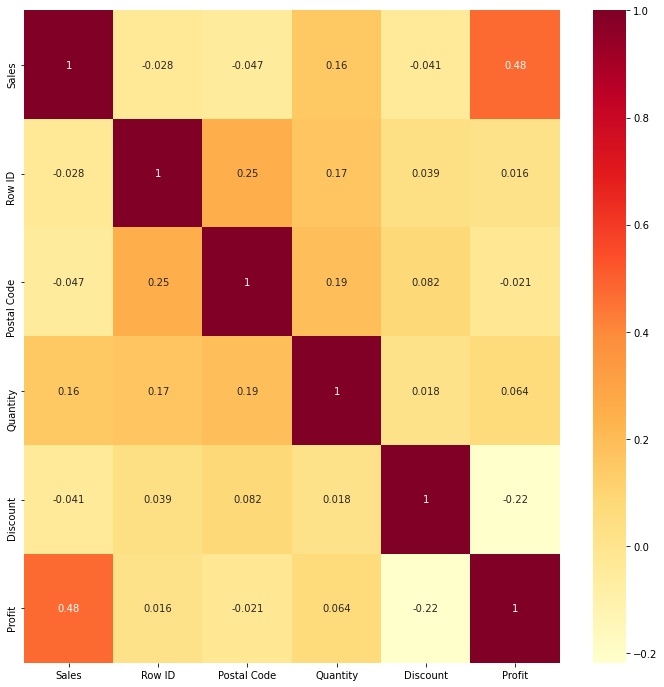

In [32]:
#Calculating Correlation
correlation = df.corr()

#Plotting correlation
matplotlib.pyplot.figure(figsize=(12,12))
corr_heatmap = sn.heatmap(correlation,annot=True,cmap="YlOrRd")

##### Sales and profit has the bigest relation.Sales and Quantity are also related to each other. 

In [9]:
df = df[['Date', 'Sales', 'Quantity', 'Profit']]

In [10]:
df = df.groupby(["Date"]).sum()
df

,Sales,Quantity,Profit
Date,,,
2016-03-31,92369.1410,1243,11441.3708
2016-06-30,134586.0130,2240,16390.3394
2016-09-30,137277.6242,2767,15823.6048
2016-12-31,229642.8178,3587,38139.8593
2017-03-31,118041.0552,1845,23506.2026
2017-06-30,130551.0360,2551,15499.2085
2017-09-30,190216.9160,3384,26985.1325
2017-12-31,273487.9340,4696,27448.7260
2018-03-31,74231.8280,1028,3811.2290


In [11]:
df.to_csv('sales_data.csv')

In [12]:
df = pd.read_csv('sales_data.csv')

In [13]:
df

,Date,Sales,Quantity,Profit
0,2016-03-31,92369.1410,1243,11441.3708
1,2016-06-30,134586.0130,2240,16390.3394
2,2016-09-30,137277.6242,2767,15823.6048
3,2016-12-31,229642.8178,3587,38139.8593
4,2017-03-31,118041.0552,1845,23506.2026
5,2017-06-30,130551.0360,2551,15499.2085
6,2017-09-30,190216.9160,3384,26985.1325
7,2017-12-31,273487.9340,4696,27448.7260
8,2018-03-31,74231.8280,1028,3811.2290
9,2018-06-30,84780.2736,1523,11204.0692


In [14]:
df = df[['Date','Sales']]
df

,Date,Sales
0,2016-03-31,92369.1410
1,2016-06-30,134586.0130
2,2016-09-30,137277.6242
3,2016-12-31,229642.8178
4,2017-03-31,118041.0552
5,2017-06-30,130551.0360
6,2017-09-30,190216.9160
7,2017-12-31,273487.9340
8,2018-03-31,74231.8280
9,2018-06-30,84780.2736


In [15]:
#df.to_csv('sales_quarterly.csv')

<AxesSubplot:>

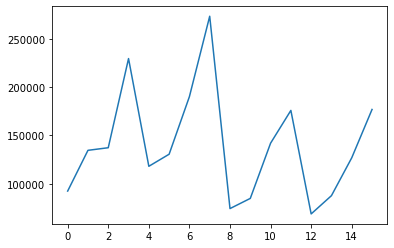

In [16]:
df['Sales'].plot()

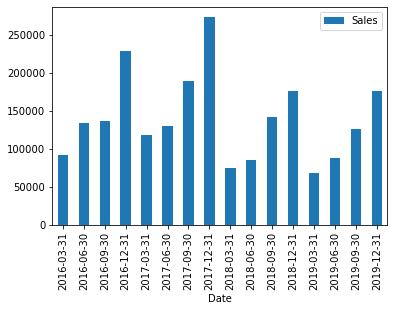

In [17]:
df.plot(x='Date', y='Sales', kind='bar') 
plt.show()

In [18]:
type(df)

pandas.core.frame.DataFrame

#### Time Series Analysis

In [19]:
df = pd.read_csv('sales_quarterly.csv')

In [20]:
df

,Date,Sales
0,3/31/2016,92369.1410
1,6/30/2016,134586.0130
2,9/30/2016,137277.6242
3,12/31/2016,229642.8178
4,3/31/2017,118041.0552
5,6/30/2017,130551.0360
6,9/30/2017,190216.9160
7,12/31/2017,273487.9340
8,3/31/2018,74231.8280
9,6/30/2018,84780.2736


In [21]:
type(df)

pandas.core.frame.DataFrame

In [22]:
# Import data as a series
new_sales = pd.read_csv('sales_quarterly.csv', index_col=[0], parse_dates=True,squeeze=True)


In [23]:
new_sales

Date
2016-03-31     92369.1410
2016-06-30    134586.0130
2016-09-30    137277.6242
2016-12-31    229642.8178
2017-03-31    118041.0552
2017-06-30    130551.0360
2017-09-30    190216.9160
2017-12-31    273487.9340
2018-03-31     74231.8280
2018-06-30     84780.2736
2018-09-30    141973.0323
2018-12-31    175924.5922
2019-03-31     68708.7906
2019-06-30     87625.8250
2019-09-30    126847.5072
2019-12-31    176913.2982
Name: Sales, dtype: float64

In [24]:
type(new_sales)

pandas.core.series.Series

#### Time Series Decomposition
##### Additive Model
##### Y(t) = Trendt(t) + Seosonality + Residual(t)

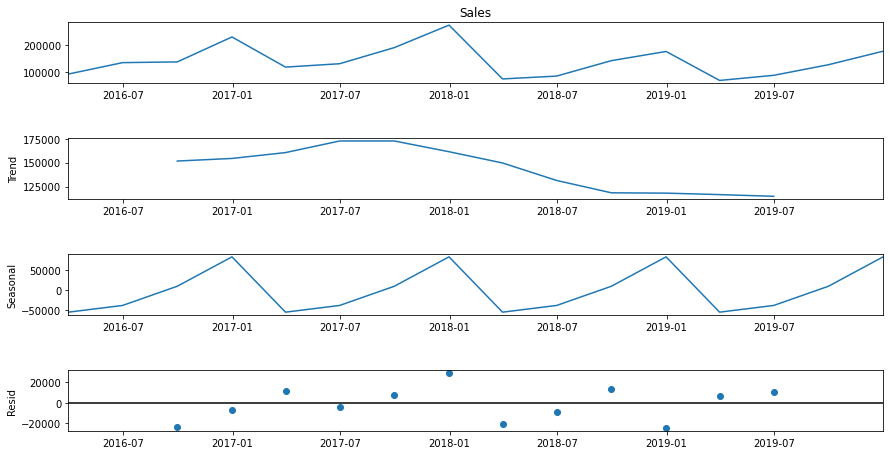

In [25]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(new_sales, model='additive')
fig = decomposition.plot()
fig.set_size_inches(14,7)
plt.show()

#### From the figure above, we see the seasonality of data. Sales increase from quarter one to quarter four for each year.

#### To predict quarter sales we use sales 2019 and supervised machine learning 

In [39]:
dataset = pd.read_csv('sales_data.csv')

In [40]:
dataset

,Date,Sales,Quantity,Profit
0,2016-03-31,92369.1410,1243,11441.3708
1,2016-06-30,134586.0130,2240,16390.3394
2,2016-09-30,137277.6242,2767,15823.6048
3,2016-12-31,229642.8178,3587,38139.8593
4,2017-03-31,118041.0552,1845,23506.2026
5,2017-06-30,130551.0360,2551,15499.2085
6,2017-09-30,190216.9160,3384,26985.1325
7,2017-12-31,273487.9340,4696,27448.7260
8,2018-03-31,74231.8280,1028,3811.2290
9,2018-06-30,84780.2736,1523,11204.0692


In [41]:
start_date = '2019-01-01'
end_date = '2019-12-31'

In [42]:
mask = (dataset['Date'] > start_date) & (dataset['Date'] <= end_date)

In [43]:
dataset = dataset.loc[mask]
dataset

,Date,Sales,Quantity,Profit
12,2019-03-31,68708.7906,990,9264.9416
13,2019-06-30,87625.8250,1604,12190.9224
14,2019-09-30,126847.5072,2241,16853.6194
15,2019-12-31,176913.2982,3144,23309.1203


In [44]:
# Ad Quarter Column
column_values = ['1','2','3','4']

dataset["Quarter"] = column_values 

dataset

<ipython-input-44-4800b01f3d47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Quarter"] = column_values


,Date,Sales,Quantity,Profit,Quarter
12,2019-03-31,68708.7906,990,9264.9416,1
13,2019-06-30,87625.8250,1604,12190.9224,2
14,2019-09-30,126847.5072,2241,16853.6194,3
15,2019-12-31,176913.2982,3144,23309.1203,4


<AxesSubplot:>

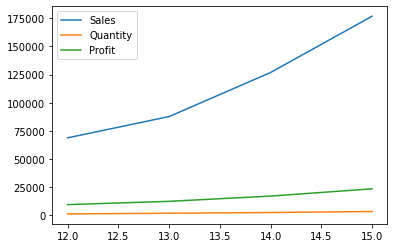

In [45]:
dataset.plot()

C:\Users\Admin\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1041: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scatter = ax.scatter(


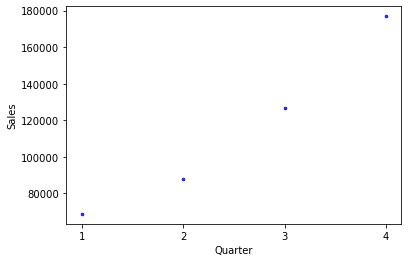

In [46]:
# Plot dataset to see sales changes based on quarter
dataset.plot.scatter(x='Quarter', y='Sales', color='b', LineStyle='-', linewidth=2.5, s=1);


#### We see that the Sales and Quarter  has linear relationship 

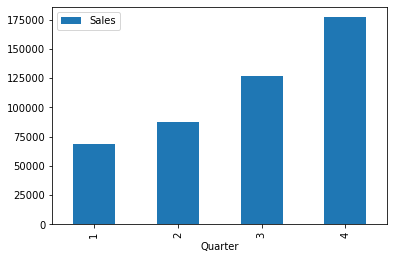

In [47]:
# Barchar plot 
dataset.plot(x='Quarter', y='Sales', kind='bar') 
plt.show()

In [48]:
# split data to features and a target 
x_data = dataset.drop(['Sales', 'Date'],axis=1)
y_data = dataset['Sales']

In [49]:
x_data

,Quantity,Profit,Quarter
12,990,9264.9416,1
13,1604,12190.9224,2
14,2241,16853.6194,3
15,3144,23309.1203,4


In [50]:
#check data
y_data

12     68708.7906
13     87625.8250
14    126847.5072
15    176913.2982
Name: Sales, dtype: float64

In [51]:
# Split the data to train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.2, shuffle=False)

In [52]:
x_train

,Quantity,Profit,Quarter
12,990,9264.9416,1
13,1604,12190.9224,2
14,2241,16853.6194,3


In [53]:
y_train

12     68708.7906
13     87625.8250
14    126847.5072
Name: Sales, dtype: float64

#### Building Linear Regression Models

In [54]:
import sklearn.linear_model
linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(x_train,y_train)
linear_prediction = linear_model.predict(x_test)
#print(linear_prediction)
R2 = linear_model.score(x_train,y_train)
print (R2)

1.0


In [55]:
#RMSE for linear
import numpy
e = y_train - linear_model.predict(x_train)
MSE = numpy.square(e).mean()
RMSE = numpy.sqrt(MSE)
print (RMSE)

8.401552174322216e-12


In [56]:
# Let's try random forest 
import sklearn.ensemble
rr_model = sklearn.ensemble.RandomForestRegressor(n_estimators=50)
rr_model.fit(x_train,y_train)
rr_predict = rr_model.predict(x_test)

In [57]:
R2 = rr_model.score(x_train,y_train)
print (R2)

0.8686030260352161


In [58]:
#RMSE for random forest
e = y_train - rr_model.predict(x_train)
MSE = numpy.square(e).mean()
RMSE = numpy.sqrt(MSE)
print (RMSE)

8776.803387222097


In [59]:
#Lasso
lasso_model = sklearn.linear_model.Lasso(alpha=1.0)
lasso_model.fit(x_train,y_train)
lasso_predict = lasso_model.predict(x_test)
print(lasso_predict)

#Ridge
r_model = sklearn.linear_model.Ridge(alpha=1.0)
r_model.fit(x_train,y_train)
r_predict = r_model.predict(x_test)
print(r_predict)

[199277.34456568]
[180589.26417916]


In [60]:
#R2 for lasso
R2 = lasso_model.score(x_train,y_train)
print (R2)

#RMSE for lasso
e = y_train - lasso_model.predict(x_train)
MSE = numpy.square(e).mean()
RMSE = numpy.sqrt(MSE)
print (RMSE)

0.9999976976006509
36.73956540788079


In [61]:
#R2 for ridge
R2 = r_model.score(x_train,y_train)
print (R2)

#RMSE for ridge
e = y_train - r_model.predict(x_train)
MSE = numpy.square(e).mean()
RMSE = numpy.sqrt(MSE)
print (RMSE)

0.9999999999592317
0.15459839918808216


## Making Predictions

### The best model to predict sales is  Ride Model

In [66]:
y_test 

15    176913.2982
Name: Sales, dtype: float64

In [68]:
y_pred = r_model.predict(x_test)

In [69]:
y_pred

array([180589.26417916])

In [71]:
data = {'Actual_Sales':  [176913.2982],
        'Predicted_Sales': [180589.26417916]}

result = pd.DataFrame(data)

print (result)

   Actual_Sales  Predicted_Sales
0   176913.2982    180589.264179
